#Importing Libraires

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout,concatenate,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Add,Activation,Conv1D,MaxPooling1D,ZeroPadding1D,AveragePooling1D,DepthwiseConv1D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Nadam,Adagrad  
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Preprocessed_data.csv")

In [ ]:
data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,ST slope_downsloping,ST slope_flat,ST slope_normal,ST slope_upsloping,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


#Spliting the dependent and independent variables

In [ ]:
In = data.drop("target",axis = 1)
Output = data["target"]

#Spliting the data into train and test

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(In,Output,test_size = 0.2, random_state = 55)

#Normalizing the Data

In [ ]:
minmax = MinMaxScaler()
col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
X_train[col] = minmax.fit_transform(X_train[col])
X_test[col] = minmax.transform(X_test[col])

#Expanding dimension of data

In [ ]:
X_train = np.expand_dims(X_train,axis = 2)
X_test = np.expand_dims(X_test,axis = 2)

#Convolutional Neural Network

In [ ]:
input_layer = Input(shape = (19,1))
X = Conv1D(32,3,strides = 1, padding = "same")(input_layer)
X = Conv1D(64,3,strides = 1, padding = "valid")(X)
X = MaxPooling1D(pool_size=2)(X)

X = Conv1D(128,3,strides = 1, padding = "valid")(X)
X = Conv1D(256,3,strides = 2, padding = "valid")(X)
X = MaxPooling1D(pool_size=2)(X)

X = Flatten()(X)
X = Dense(64,activation = "relu")(X)
X = Dense(32,activation = "relu")(X)
output_layer = Dense(1,activation = "sigmoid")(X)

model1 = Model(inputs = input_layer, outputs = output_layer)
model1.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])
model1.fit(X_train,Y_train,epochs = 100, batch_size = 64)
model1.evaluate(X_test,Y_test)

Epoch 1/100
12/12 [==============================] - 2s 16ms/step - loss: 0.5287 - accuracy: 0.7523
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3886 - accuracy: 0.8358
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3621 - accuracy: 0.8530
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 0.3513 - accuracy: 0.8556
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3455 - accuracy: 0.8556
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3391 - accuracy: 0.8583
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3324 - accuracy: 0.8662
Epoch 8/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3339 - accuracy: 0.8675
Epoch 9/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3291 - accuracy: 0.8715
Epoch 10/100
12/12 [==============================] - 0s 16ms/step - loss: 0.3236 - accuracy: 0.8781

[0.6165429353713989, 0.9047619104385376]

#Combination of Resnet, Mobilenet, VGG16

##Resnet Blocks

In [ ]:
def identity_block(input,k_size, filters):

  # initial input is stored in shortcut variable, input is passed through 3 blocks each with 1D CNN, BN 
  # after passing input from 3 blocks, output of 3rd block is added with the initial input which is stored in shortcut variable
  shortcut = input
  f1,f2,f3 = filters
  #Resnet50 with 3 block of CNN, BN
  #1st block
  X = Conv1D(filters = f1,kernel_size = 1, strides = 1, padding = "valid")(input)
  X = BatchNormalization(axis = -1)(X)
  X = Activation("relu")(X)

  #2nd block
  X = Conv1D(filters = f2, kernel_size = k_size, strides = 1, padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation("relu")(X)

  #3rd block 
  X = Conv1D(filters = f3, kernel_size = 1, strides = 1, padding= "valid")(X)
  X = BatchNormalization(axis = -1)(X)

  #Residual Connection Adding X, and Initial Input(shortcut)
  X = Add()([X,shortcut])
  X = Activation("relu")(X)

  return X

In [ ]:
def conv_block(input,k_size, filters, stride_size = 2):

  #initial input is stored in shortcut variable, input is passed through 3 blocks each with 1D CNN, BN
  # shortcut is passed through 1 block which consist of 1D CNN, BN
  # output of 3rd block, and output of shortcut which is passed from 1 block are added.
  shortcut = input
  f1,f2,f3 = filters
  # 1st block
  X = Conv1D(filters = f1, kernel_size = 1, strides= stride_size, padding = "valid" )(input)
  X = BatchNormalization(axis = -1)(X)
  X = Activation("relu")(X)

  #2nd block
  X = Conv1D(filters = f2, kernel_size = k_size, strides = 1, padding = "same")(X)
  X = BatchNormalization(axis = -1)(X)
  X = Activation("relu")(X)

  #3rd block
  X = Conv1D(filters = f3, kernel_size = 1, strides = 1, padding = "valid")(X)
  X = BatchNormalization(axis = -1 )(X)

  #shortcut passed through CNN, BN
  shortcut = Conv1D(filters = f3, kernel_size = 1, strides = stride_size, padding = "valid")(shortcut)
  shortcut = BatchNormalization(axis = -1)(shortcut)

  # Residual Connection, Adding X, and shortcut
  X = Add()([X,shortcut])
  X = Activation("relu")(X)

  return X


##Mobilenet Blocks

In [ ]:
def depthwise(inp,filters,stride ):
  x = DepthwiseConv1D(kernel_size = 3, padding = "same")(inp)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  
  x = Conv1D(kernel_size = 1, filters = filters, strides = stride)(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  return x



def conv_mobile_net(inp,k_size, filters, stride):
  x = Conv1D(filters = filters, kernel_size = k_size, strides = stride, padding = "same")(inp)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)
  return x





## Combined Model (Resnet50, Mobilenet, VGG16)
    2 blocks of Resnet50
    1 block of Mobilenet
    2 blocks of VGG16 

In [ ]:
def combined_model(input_shape = (19,1)):
  input_layer = Input(shape = input_shape)
  resnet = ZeroPadding1D()(input_layer)


  resnet = Conv1D(64,7,strides = 2)(resnet)
  resnet = BatchNormalization(axis = -1)(resnet)
  resnet = Activation("relu")(resnet)
  resnet = MaxPooling1D(pool_size = (3), strides = 2)(resnet)
  # Skip connection block 1
  resnet = conv_block(input = resnet,k_size = 3, filters = [64,64,256],stride_size = 1)
  resnet = identity_block(input = resnet, k_size = 3, filters = [64,64,256])
  resnet = identity_block(input = resnet, k_size = 3, filters = [64,64,256])
  
  #Skip connection Block 2
  resnet = conv_block(input = resnet, k_size = 3, filters = [128,128,512],stride_size = 2)
  resnet = identity_block(input = resnet, k_size = 3, filters = [128,128,512])
  resnet = identity_block(input = resnet, k_size = 3, filters = [128,128,512])
  resnet = identity_block(input = resnet, k_size = 3, filters = [128,128,512])

  resnet_flat = Flatten()(resnet)

  #MobileNet

  #block 1
  mobilent = conv_mobile_net(inp = input_layer,k_size = 3,filters = 512,stride = 4) #32
  mobilent = depthwise(inp = mobilent, filters = 512, stride = 3) #32 filters

  mobilenet_flat = Flatten()(mobilent)

  #VGG16
  #block 1
  vgg = Conv1D(filters = 64, kernel_size = 3,activation = "relu",strides = 1,padding="same")(input_layer)
  vgg = Conv1D(filters = 64, kernel_size = 3,activation = "relu",strides = 1,padding="same")(vgg)
  vgg = MaxPooling1D(pool_size = 2)(vgg)
  
  #block 2
  vgg = Conv1D(filters = 128, kernel_size = 3,activation = "relu",strides = 1,padding="same")(vgg)
  vgg = Conv1D(filters = 512, kernel_size = 3,activation = "relu",strides = 2,padding="same")(vgg) #stride = 1, filters = 128
  vgg = MaxPooling1D(pool_size = 2)(vgg) #pool size = 2
  
  vgg_flat = Flatten()(vgg)
  


  concat = Add()([resnet_flat,mobilenet_flat,vgg_flat])
  X = Dense(256,activation = "relu")(concat)
  X = Dense(128,activation = "relu")(X)
  X = Dense(32,activation= "relu")(X)
  output_layer = Dense(1,activation = "sigmoid")(X)

  model = Model(input_layer,output_layer)
  return model

combined_model1 = combined_model()
combined_model1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
history=combined_model1.fit(X_train,Y_train,epochs = 50, batch_size = 64)

Epoch 1/50
12/12 [==============================] - 16s 186ms/step - loss: 1.4411 - accuracy: 0.6848
Epoch 2/50
12/12 [==============================] - 2s 183ms/step - loss: 0.3599 - accuracy: 0.8490
Epoch 3/50
12/12 [==============================] - 2s 187ms/step - loss: 0.3042 - accuracy: 0.8848
Epoch 4/50
12/12 [==============================] - 2s 185ms/step - loss: 0.2873 - accuracy: 0.8795
Epoch 5/50
12/12 [==============================] - 2s 184ms/step - loss: 0.3484 - accuracy: 0.8742
Epoch 6/50
12/12 [==============================] - 2s 182ms/step - loss: 0.2597 - accuracy: 0.8874
Epoch 7/50
12/12 [==============================] - 2s 182ms/step - loss: 0.2915 - accuracy: 0.8768
Epoch 8/50
12/12 [==============================] - 2s 179ms/step - loss: 0.2175 - accuracy: 0.9192
Epoch 9/50
12/12 [==============================] - 2s 180ms/step - loss: 0.2454 - accuracy: 0.8980
Epoch 10/50
12/12 [==============================] - 2s 177ms/step - loss: 0.2193 - accuracy: 0.912

###Test Accuracy

In [ ]:
combined_model1.evaluate(X_test,Y_test)

6/6 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.9418


[0.6873089671134949, 0.9417989253997803]

###Saving the model

In [ ]:
#combined_model1.save("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Combination_of_Resnet_mobilenet_vgg_94.18%accuracy.h5")
model = load_model("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Combination_of_Resnet_mobilenet_vgg_94.18%accuracy.h5")

###Heatmap

[]

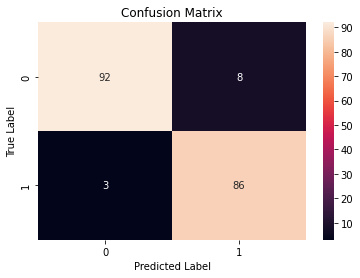

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = np.round(abs(Y_pred))
conf_matrix = confusion_matrix(Y_test,Y_pred)

sns.heatmap(conf_matrix,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.savefig("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Heart_Disease_Pictures/CM_CNN.png",format = "png",dbi = 1200)
plt.plot()

#Covolutional Neural Network (Resnet50, VGG16, MobileNet) as a feature extractor with Random Forest 

In [ ]:
loss = 1.0e-3
class MyCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs = {}):
    if logs.get("loss")< loss:
      self.model.stop_training = True

mycallback = MyCallBack()

In [ ]:
input_shape = (19,1)
input_layer = Input(shape = input_shape)
resnet = ZeroPadding1D()(input_layer)


resnet = Conv1D(64,7,strides = 2)(resnet)
resnet = BatchNormalization(axis = -1)(resnet)
resnet = Activation("relu")(resnet)
resnet = MaxPooling1D(pool_size = (3), strides = 2)(resnet)
# Skip connection block 1
resnet = conv_block(input = resnet,k_size = 3, filters = [64,64,256],stride_size = 1)
resnet = identity_block(input = resnet, k_size = 3, filters = [64,64,256])
resnet = identity_block(input = resnet, k_size = 3, filters = [64,64,256])

#Skip connection Block 2
resnet = conv_block(input = resnet, k_size = 3, filters = [128,128,512],stride_size = 2)
resnet = identity_block(input = resnet, k_size = 3, filters = [128,128,512])
resnet = identity_block(input = resnet, k_size = 3, filters = [128,128,512])
resnet = identity_block(input = resnet, k_size = 3, filters = [128,128,512])

resnet_flat = Flatten()(resnet)

#MobileNet

#block 1
mobilent = conv_mobile_net(inp = input_layer,k_size = 3,filters = 512,stride = 4) #32
mobilent = depthwise(inp = mobilent, filters = 512, stride = 3) #32 filters

mobilenet_flat = Flatten()(mobilent)

#VGG16
#block 1
vgg = Conv1D(filters = 64, kernel_size = 3,activation = "relu",strides = 1,padding="same")(input_layer)
vgg = Conv1D(filters = 64, kernel_size = 3,activation = "relu",strides = 1,padding="same")(vgg)
vgg = MaxPooling1D(pool_size = 2)(vgg)

#block 2
vgg = Conv1D(filters = 128, kernel_size = 3,activation = "relu",strides = 1,padding="same")(vgg)
vgg = Conv1D(filters = 512, kernel_size = 3,activation = "relu",strides = 2,padding="same")(vgg) #stride = 1, filters = 128
vgg = MaxPooling1D(pool_size = 2)(vgg) #pool size = 2

vgg_flat = Flatten()(vgg)



concat = Add()([resnet_flat,mobilenet_flat,vgg_flat])
feature_extractor = Model(inputs = input_layer, outputs = concat)

X = Dense(64,activation = "relu")(feature_extractor.output)


output_layer = Dense(1,activation = "sigmoid")(X)

cnn_model = Model(inputs = feature_extractor.input, outputs = output_layer)


cnn_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
cnn_model.fit(X_train,Y_train,epochs = 100, batch_size = 64,callbacks = [mycallback])

Epoch 1/100
12/12 [==============================] - 14s 170ms/step - loss: 0.9989 - accuracy: 0.7523
Epoch 2/100
12/12 [==============================] - 2s 169ms/step - loss: 0.3693 - accuracy: 0.8503
Epoch 3/100
12/12 [==============================] - 2s 173ms/step - loss: 0.2996 - accuracy: 0.8781
Epoch 4/100
12/12 [==============================] - 2s 170ms/step - loss: 0.3255 - accuracy: 0.8596
Epoch 5/100
12/12 [==============================] - 2s 172ms/step - loss: 0.3012 - accuracy: 0.8755
Epoch 6/100
12/12 [==============================] - 2s 172ms/step - loss: 0.2975 - accuracy: 0.8887
Epoch 7/100
12/12 [==============================] - 2s 169ms/step - loss: 0.2995 - accuracy: 0.8702
Epoch 8/100
12/12 [==============================] - 2s 172ms/step - loss: 0.2198 - accuracy: 0.9126
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 0.2608 - accuracy: 0.8874
Epoch 10/100
12/12 [==============================] - 2s 172ms/step - loss: 0.2047 - accur

In [ ]:
cnn_model.evaluate(X_test,Y_test)

6/6 [==============================] - 1s 15ms/step - loss: 2.5935 - accuracy: 0.8783


[2.59354567527771, 0.8783068656921387]

In [ ]:
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

In [ ]:
Rf_with_CNN = RandomForestClassifier()
Rf_with_CNN.fit(X_train_features,Y_train)
Rf_with_CNN.score(X_train_features,Y_train)
Rf_with_CNN.score(X_test_features,Y_test)

0.8941798941798942

0.9523809523809523